In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.integrate import solve_ivp
import utils
%load_ext autoreload
%autoreload 2

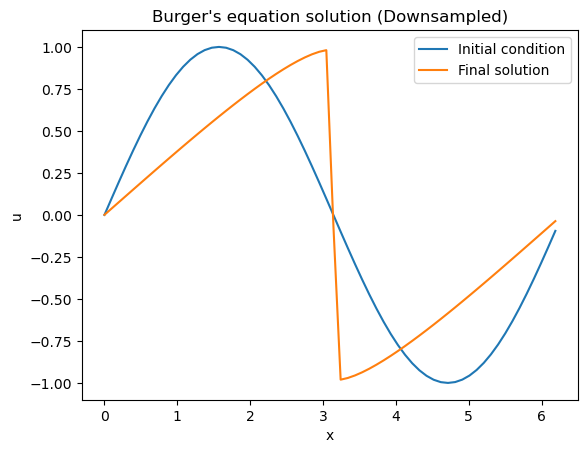

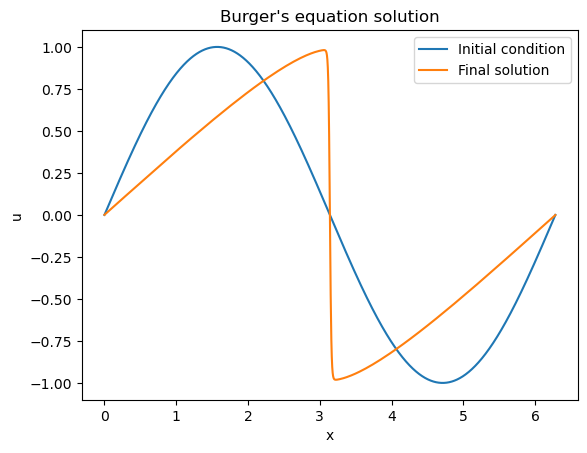

In [2]:

# Parameters
L = 2*np.pi  # Spatial domain length
T = 1.6037  # Time domain length
nu = 0.01  # Viscosity coefficient
N = 2**11  # Number of grid points
dt = 0.001  # Time step
dx = L / N   # Spatial step

# Initialize grid
x = np.linspace(0, L, N)
u0 = -np.sin(x-np.pi)  # Initial condition
u = u0.copy()


kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Define the KdV equation
def rhsBurgers(t,u,kappa,nu): 
    uhat = np.fft.fft(u)
    d_uhat = (1j)*kappa*uhat
    dd_uhat = -np.power(kappa,2)*uhat
    d_u = np.fft.ifft(d_uhat)
    dd_u = np.fft.ifft(dd_uhat)
    du_dt = -u * d_u + nu*dd_u
    return du_dt.real

# Solve Burger's equation using odeint
t = np.linspace(0,T,500)

sol =  solve_ivp(rhsBurgers, [t[0], t[-1]], u0, t_eval=t, args=(kappa,nu))
u = sol.y.T
# Plot results
space_res = 64  # Desired spatial resolution

# Downsample the solution
downsampled_u = u[:, ::N//space_res]

plt.plot(x[::N//space_res], u0[::N//space_res], label='Initial condition')
plt.plot(x[::N//space_res], downsampled_u[-1,:], label='Final solution')
plt.xlabel('x')
plt.ylabel('u')
plt.title("Burger's equation solution (Downsampled)")
plt.legend()
plt.show()

    
# Plot results
plt.plot(x, u0, label='Initial condition')
plt.plot(x, u[-1,:], label='Final solution')
plt.xlabel('x')
plt.ylabel('u')
plt.title("Burger's equation solution")
plt.legend()
plt.show()

In [12]:
space_res = 67
x_grid,t_points,u_initial,u_solution = utils.burgers_equation_simulation2(u0, x, dt, T, nu,space_res,50,keep_first_t=False,solver='Fourier')
# Plot results

In [18]:
x_grid,u_t_train, u_0_train = utils.simulate_IC(2,None,L, 2**11, T, dt, nu,
                                                plotting=False,keep_first_t=False,
                                                space_res=2**7,time_res=2**6,old_ic=False,solver='Fourier')







Simulations: 100%|██████████| 2/2 [00:23<00:00, 11.96s/it]


In [22]:
x_grid.shape

(128,)

In [19]:
u_0_train

(2, 64, 128)

In [29]:
plt.plot(x_grid, u_0_train[1,0,:], label='Initial condition')
plt.plot(x_grid, u_t_train[1,-1,:], label='Final solution')
plt.xlabel('x')
plt.ylabel('u')
plt.title("Burger's equation solution")
plt.legend()
plt.show()
plt.figure(figsize=(4,4))
plt.imshow(u_t_train[0].real, aspect='auto', extent=[x[0], x[-1], t[-1], t[0]], cmap='jet')
plt.show()

SyntaxError: invalid syntax (3424297860.py, line 9)

In [56]:
def solve_burgers(u0,nu,T,N,dx):
    kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

    # Define the KdV equation
    def rhsBurgers(t,u,kappa,nu): 
        uhat = np.fft.fft(u)
        d_uhat = (1j)*kappa*uhat
        dd_uhat = -np.power(kappa,2)*uhat
        d_u = np.fft.ifft(d_uhat)
        dd_u = np.fft.ifft(dd_uhat)
        du_dt = -u * d_u + nu*dd_u
        return du_dt.real

    # Solve Burger's equation using odeint
    t = np.linspace(0,T,500)

    sol =  solve_ivp(rhsBurgers, [t[0], t[-1]], u0, t_eval=t, args=(kappa,nu))
    u = sol.y
    return u

In [52]:
import utils 

u_solution, t_points= utils.burgers_equation_simulation(u0,x,0.001,T,nu)

/Users/povlklarlund/Documents/data_driven_methods/NeuralOperators/utils.py:82: RuntimeWarning: overflow encountered in scalar multiply
  u_next[j] = u_prev[j] - u_prev[j] * (dt / dx) * (u_prev[j] - u_prev[j - 1]) + (nu * dt / dx**2) * (u_prev[j + 1] - 2 * u_prev[j] + u_prev[j - 1])
/Users/povlklarlund/Documents/data_driven_methods/NeuralOperators/utils.py:82: RuntimeWarning: invalid value encountered in scalar subtract
  u_next[j] = u_prev[j] - u_prev[j] * (dt / dx) * (u_prev[j] - u_prev[j - 1]) + (nu * dt / dx**2) * (u_prev[j + 1] - 2 * u_prev[j] + u_prev[j - 1])
/Users/povlklarlund/Documents/data_driven_methods/NeuralOperators/utils.py:82: RuntimeWarning: invalid value encountered in scalar add
  u_next[j] = u_prev[j] - u_prev[j] * (dt / dx) * (u_prev[j] - u_prev[j - 1]) + (nu * dt / dx**2) * (u_prev[j + 1] - 2 * u_prev[j] + u_prev[j - 1])


In [90]:
# Initialize grid
x = np.linspace(0, L, N)
w = np.round((np.random.random(8)) , 2)
u_init = utils.gen_u_initial(N,n_freq=4)
u = solve_burgers(u_init,nu,T,N,dx)
u2,_ = utils.burgers_equation_simulation(u_init,x,0.0001,T,nu)


In [100]:
u2,_ = utils.burgers_equation_simulation(u_init,x,0.0001,T,nu)


In [106]:
_,_,_,u3 = utils.burgers_equation_simulation2(u_init, x, 0.0001, T, nu,N,500,keep_first_t=True)


In [107]:
u.shape

(2048, 500)

In [108]:
u3.shape

(2048, 502)

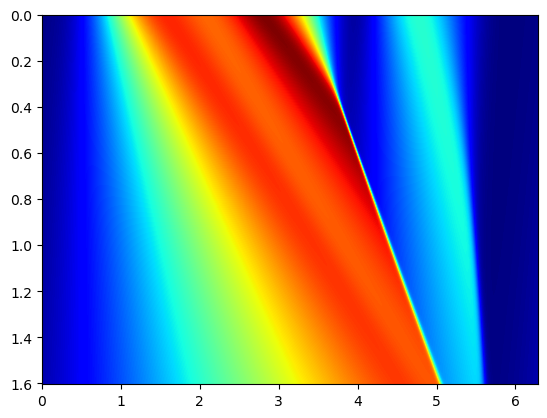

/Users/povlklarlund/miniconda3/envs/DDM/lib/python3.9/site-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in scalar subtract
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/Users/povlklarlund/miniconda3/envs/DDM/lib/python3.9/site-packages/matplotlib/image.py:463: RuntimeWarning: invalid value encountered in scalar subtract
  newmin = vmid - dv * fact


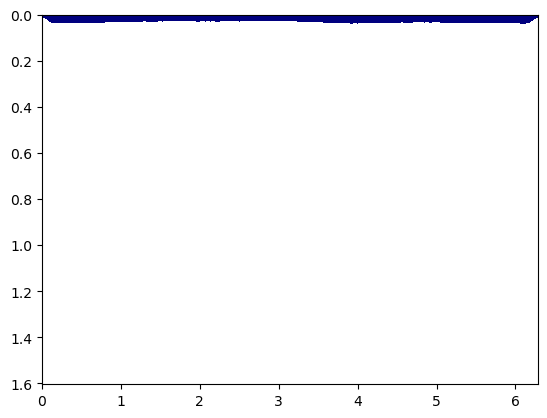

In [101]:
plt.imshow(u.T.real, aspect='auto', extent=[x[0], x[-1], t[-1], t[0]], cmap='jet')
plt.show()
plt.imshow(u2.T.real, aspect='auto', extent=[x[0], x[-1], t[-1], t[0]], cmap='jet')
plt.show()

In [81]:
u2,_ = utils.burgers_equation_simulation(u0,x,0.0001,T,nu)

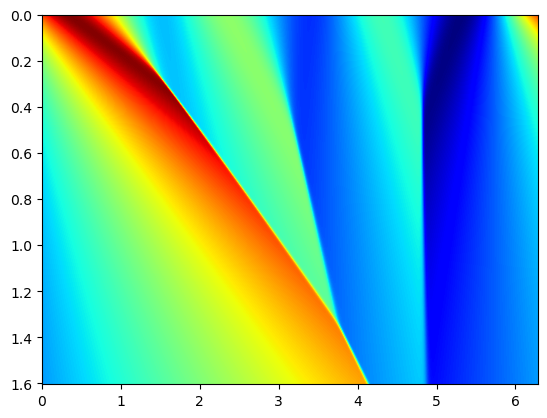

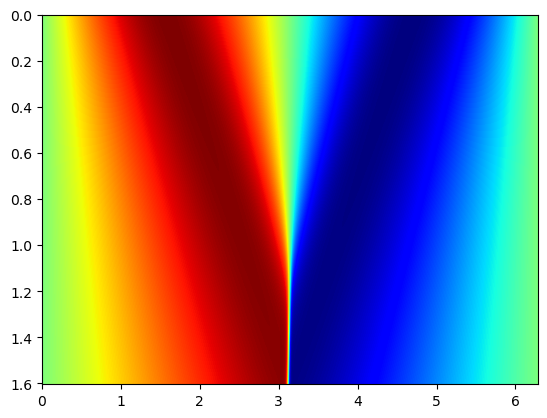

In [82]:
plt.imshow(u.T.real, aspect='auto', extent=[x[0], x[-1], t[-1], t[0]], cmap='jet')
plt.show()
plt.imshow(u2.T.real, aspect='auto', extent=[x[0], x[-1], t[-1], t[0]], cmap='jet')
plt.show()

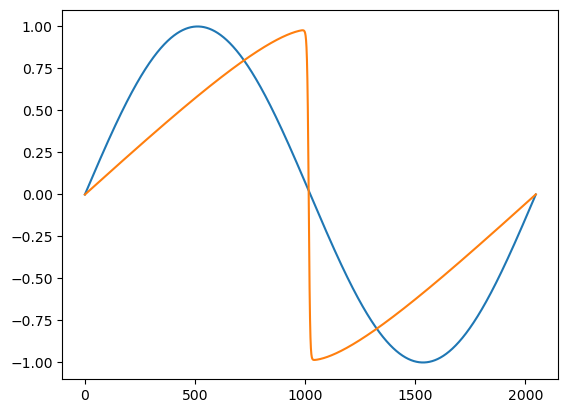

In [83]:
plt.plot(u2.T[0])

plt.plot(u2.T[-1])